 # Final Project: Leah Fitzgerald

The purpose of my final project analysis is to see what show viewers on Twitter like more, Jeopardy! or Wheel of Fortune. One motivation that has driven me in the creation of this analysis is a debate between a few of my roommates and Erica and I. Ms. Erica and I believe that Jeopardy! is a better show for numerous reasons. Our roommates disagree. With this analysis, I can show them step-by-step what users are saying on Twitter. 

I will start my analysis of tweets regarding Jeopardy! and Wheel of Fortune by importing the libraries necessary. The hypothesis I am testing in this analysis is: Users of Twitter will generally favor and say more positive things about Jeopardy! vs. Wheel of Fortune. The audience of my analysis would be Jeopardy! and Wheel of Fortune fans, and viewers of both shows.  

My conclusions will give me insight as to whether Twitter users are more positively talking about either WOF or Jeopardy, and also specifics about what people have to say about the hosts. So first, understanding which show is better received based on the tweets collected. I have done this by pulling data about each game and the hosts into 2 files.

 The data used is all coming from the Twitter API that has pulled tweets from the past 7 days. It provides personal experiences and perspectives from a wide variety of users on Twitter.

### Data Collection

I have collected 600 samples of tweets regarding Jeopardy and 600 tweets regarding Wheel of Fortune. 

In [2]:
import requests
import pandas as pd
import urllib
import json

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
ls

In [14]:
bearer_token = pd.read_csv('bearer_token.txt', header = 0)

I start by asking it to read my bearer_token text file. This contains the token I need to get data back from the Twitter API

In [ ]:
bearer_token['Bearer_token'].iloc[0]

In [15]:
header = {'Authorization' : 'Bearer {}'.format(bearer_token['Bearer_token'].iloc[0])}

In [16]:
endpoint_url = 'https://api.twitter.com/2/tweets/search/recent'

In [17]:
query = urllib.parse.quote('#Jeopardy OR #KenJennings OR @KenJennings OR @MissMayim OR #MayimBialik OR @Jeopardy lang:en')

Here I am creating a query to parse the topics and language for my url. 

In [18]:
query

'%23Jeopardy%20OR%20%23KenJennings%20OR%20%40KenJennings%20OR%20%40MissMayim%20OR%20%23MayimBialik%20OR%20%40Jeopardy%20lang%3Aen'

In [19]:
tweet_fields = 'public_metrics,created_at,lang,possibly_sensitive,attachments,source'

I am declaring the tweet fields I would like to see from Twitter.

In [20]:
my_api_url = endpoint_url + '?query={}&tweet.fields={}'.format(query, tweet_fields)

Here I am consolidating my url with the query.

In [ ]:
my_api_url

In [24]:
expansions = 'author_id'

I added author_id as an expansion to get more information.

In [22]:
url = endpoint_url + '?query={}&tweet.fields={}'.format(query, tweet_fields)

In [25]:
url_expansions = endpoint_url + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query, tweet_fields, expansions, 'username')

Here I am specifying what I would like from the twitter data. Specifically max results of 100 tweets, tweet fields, expansions, and user fields. 

In [26]:
url_expansions

'https://api.twitter.com/2/tweets/search/recent?query=%23Jeopardy%20OR%20%23KenJennings%20OR%20%40KenJennings%20OR%20%40MissMayim%20OR%20%23MayimBialik%20OR%20%40Jeopardy%20lang%3Aen&max_results=100&tweet.fields=public_metrics,created_at,lang,possibly_sensitive,attachments,source&expansions=author_id&user.fields=username'

In [27]:
response_1 = requests.request("GET", url_expansions, headers = header)

Here I am asking Twitter to answer my request using "GET" with my url. 

In [ ]:
response_1.text

In [28]:
response_1_dict = json.loads(response_1.text)

Loading Twitter data into json

In [29]:
response_1_dict.keys()

dict_keys(['data', 'includes', 'meta'])

This tells me what I can ask the API to show me. 

In [30]:
my_df = pd.DataFrame(response_1_dict['data'])

I am creating a data frame with the 'data' key.

In [31]:
my_df.head()

,public_metrics,id,author_id,text,created_at,possibly_sensitive,lang,source,attachments
0,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055869908312066,31590111,@JenniferBurt @TheDudeInSF @missmayim You are ...,2021-12-09T21:26:27.000Z,False,en,Twitter Web App,NaN
1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055781618298882,2479845637,#Jeopardy! fans are obsessed with this contest...,2021-12-09T21:26:06.000Z,False,en,SocialFlow,{'media_keys': ['3_1469055779160403974']}
2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055523379154955,1318277923,@Jeopardy Does anyone else think he looks a lo...,2021-12-09T21:25:05.000Z,False,en,Twitter Web App,NaN
3,"{'retweet_count': 80, 'reply_count': 0, 'like_...",1469055109342638092,28445420,RT @KenJennings: Delighted that @missmayim and...,2021-12-09T21:23:26.000Z,False,en,Twitter for iPhone,NaN
4,"{'retweet_count': 270, 'reply_count': 0, 'like...",1469055053864525836,1328060923244933120,RT @peterbelayneh: የ #TDF ጀግንነት ታሪክ ላይ ተፅፏል \n...,2021-12-09T21:23:13.000Z,False,und,Twitter for Android,{'media_keys': ['7_1468804403410857986']}


In [ ]:
response_1_dict['meta']

Getting next token

In [33]:
my_api_url_2 = my_api_url + '&next_token={}&max_results=100'.format(response_1_dict['meta']['next_token'])

In [34]:
my_api_url_2

'https://api.twitter.com/2/tweets/search/recent?query=%23Jeopardy%20OR%20%23KenJennings%20OR%20%40KenJennings%20OR%20%40MissMayim%20OR%20%23MayimBialik%20OR%20%40Jeopardy%20lang%3Aen&tweet.fields=public_metrics,created_at,lang,possibly_sensitive,attachments,source&next_token=b26v89c19zqg8o3fpdy9ckfxcsqie3djesjb40kjan6v1&max_results=100'

In [35]:
response_2 = requests.request("GET", my_api_url_2, headers = header)

In [ ]:
response_2.text

In [36]:
my_df = my_df.append(pd.DataFrame(json.loads(response_2.text)['data']), ignore_index= True)

Adding the new data collected to existing data frame

In [ ]:
my_df

My data frame now has 200 records. 

In [ ]:
response_1_dict['meta']

Collecting next token for next request of tweets. 

In [29]:
response_3 = requests.request("GET", my_api_url_2, headers = header)

In [ ]:
response_3.text

In [31]:
my_df = my_df.append(pd.DataFrame(json.loads(response_3.text)['data']), ignore_index= True)

Adding the new tweets I've collected to the other 200 tweets. 

In [32]:
my_df.tail()

,source,text,author_id,possibly_sensitive,lang,id,public_metrics,created_at,attachments
293,Twitter for iPhone,@equimanthorn_ @Jeopardy Got my vote.,NaN,False,en,1469018445693943812,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-09T18:57:45.000Z,NaN
294,Twitter for iPhone,RT @missmayim: Class is in session! Welcome to...,NaN,False,en,1469018191850573833,"{'retweet_count': 16, 'reply_count': 0, 'like_...",2021-12-09T18:56:44.000Z,"{'media_keys': ['3_1469018140524748801', '3_14..."
295,Twitter for iPhone,Class is in session! Welcome to the first-ever...,NaN,False,en,1469018145268453378,"{'retweet_count': 16, 'reply_count': 12, 'like...",2021-12-09T18:56:33.000Z,"{'media_keys': ['3_1469018140524748801', '3_14..."
296,Twitter for Android,RT @peterbelayneh: የ #TDF ጀግንነት ታሪክ ላይ ተፅፏል \n...,NaN,False,und,1469017354508161024,"{'retweet_count': 268, 'reply_count': 0, 'like...",2021-12-09T18:53:24.000Z,{'media_keys': ['7_1468804403410857986']}
297,Twitter for iPhone,@buzztronics @Jeopardy @missmayim @KenJennings...,NaN,False,en,1469017228385345536,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-09T18:52:54.000Z,NaN


In [ ]:
response_1_dict['meta']

In [39]:
response_4 = requests.request("GET", my_api_url_2, headers = header)

In [ ]:
response_4.text

In [40]:
my_df = my_df.append(pd.DataFrame(json.loads(response_4.text)['data']), ignore_index= True)

In [ ]:
my_df

In [ ]:
response_1_dict['meta']

In [39]:
response_5 = requests.request("GET", my_api_url_2, headers = header)

In [ ]:
response_5.text

In [42]:
my_df = my_df.append(pd.DataFrame(json.loads(response_4.text)['data']), ignore_index= True)

In [43]:
my_df.tail()

,public_metrics,id,author_id,text,created_at,possibly_sensitive,lang,source,attachments
395,"{'retweet_count': 60, 'reply_count': 0, 'like_...",1469018769599221767,NaN,RT @Jeopardy: Thank you to educators everywher...,2021-12-09T18:59:02.000Z,False,en,Twitter for Android,{'media_keys': ['3_1468330655360507904']}
396,"{'retweet_count': 16, 'reply_count': 0, 'like_...",1469018736174764033,NaN,RT @missmayim: Class is in session! Welcome to...,2021-12-09T18:58:54.000Z,False,en,Twitter for iPhone,"{'media_keys': ['3_1469018140524748801', '3_14..."
397,"{'retweet_count': 274, 'reply_count': 0, 'like...",1469018735776354316,NaN,RT @Jeopardy: We are delighted to let you know...,2021-12-09T18:58:54.000Z,False,en,Twitter for Android,NaN
398,"{'retweet_count': 20, 'reply_count': 0, 'like_...",1469018669334290434,NaN,RT @missmayim: Guess what! Today is the day?! ...,2021-12-09T18:58:38.000Z,False,en,Twitter for Android,NaN
399,"{'retweet_count': 16, 'reply_count': 0, 'like_...",1469018642138349572,NaN,RT @missmayim: Class is in session! Welcome to...,2021-12-09T18:58:31.000Z,False,en,Twitter for Android,"{'media_keys': ['3_1469018140524748801', '3_14..."


In [ ]:
response_1_dict['meta']

In [45]:
response_6 = requests.request("GET", my_api_url_2, headers = header)

In [46]:
my_df = my_df.append(pd.DataFrame(json.loads(response_4.text)['data']), ignore_index= True)

In [ ]:
my_df

My data frame now has 500 tweets. This is the amount of tweets I would like to collect about Jeopardy!, Ken Jennings, or Mayim Bialik (Jeopardy! hosts)

In [48]:
my_df.to_csv('jeopardy_data.csv')

Converting data to .csv file for further analysis

## WOF Tweet Gathering

In [ ]:
response_1_dict['meta']

This gives me the next_token I can use to make another request.

In [67]:
endpoint_url_3 = 'https://api.twitter.com/2/tweets/search/recent'

Here I am creating a new url to pull tweets from the Twitter API

In [68]:
query = urllib.parse.quote('#WOF OR #WheelOfFourtune OR #PatSajak OR @PatSajak lang:en')

Here I am creating a second query to search for Wheel of Fortune or Pat Sajak

In [69]:
query

'%23WOF%20OR%20%23WheelOfFourtune%20OR%20%23PatSajak%20OR%20%40PatSajak%20lang%3Aen'

In [70]:
tweet_fields = 'public_metrics,created_at,lang,possibly_sensitive,attachments,source'

Here I am defining the tweet fields I would like the API to include when I ask for data.

In [71]:
expansions = 'author_id'

In [72]:
url = endpoint_url_3 + '?query={}&tweet.fields={}'.format(query, tweet_fields)

In [73]:
url_expansions = endpoint_url_3 + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query, tweet_fields, expansions, 'username')

Here I am specifying the fields and conditions that I would like to see from the Twitter data collected. 

In [74]:
url_expansions

'https://api.twitter.com/2/tweets/search/recent?query=%23WOF%20OR%20%23WheelOfFourtune%20OR%20%23PatSajak%20OR%20%40PatSajak%20lang%3Aen&max_results=100&tweet.fields=public_metrics,created_at,lang,possibly_sensitive,attachments,source&expansions=author_id&user.fields=username'

This is the url of my request from Twitter of tweets regarding WOF and Pat Sajak

In [75]:
Wresponse_1 = requests.request("GET", url_expansions, headers = header)

Here I am making my request for 100 tweets of Twitter data. This time about WOF

In [ ]:
Wresponse_1.text

In [76]:
Wresponse_1_dict = json.loads(Wresponse_1.text)

In [77]:
Wresponse_1_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [78]:
my_df2 = pd.DataFrame(Wresponse_1_dict['data'])

I am creating a data frame with the 'data' key.

In [79]:
my_df2.tail()

,possibly_sensitive,text,author_id,lang,source,public_metrics,created_at,id,attachments
95,False,@sandergansen @WorldOfFreight @supplain Im so ...,261232333,en,Twitter Web App,"{'retweet_count': 5, 'reply_count': 3, 'like_c...",2021-12-09T18:23:03.000Z,1469009714826653702,NaN
96,False,RT @patsajak: “Please hold. Your call is impor...,505353338,en,Twitter for Android,"{'retweet_count': 107, 'reply_count': 0, 'like...",2021-12-09T18:19:58.000Z,1469008938909806593,NaN
97,False,RT @patsajak: “Please hold. Your call is impor...,297558558,en,Twitter for iPhone,"{'retweet_count': 107, 'reply_count': 0, 'like...",2021-12-09T18:18:47.000Z,1469008641047019526,NaN
98,False,@MaryMacMixes @patsajak Wellcare,1007792130,en,Twitter for iPad,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-09T18:17:50.000Z,1469008403594887169,NaN
99,False,RT @patsajak: “Please hold. Your call is impor...,1402776664866701317,en,Twitter for iPhone,"{'retweet_count': 107, 'reply_count': 0, 'like...",2021-12-09T18:16:24.000Z,1469008040959655940,NaN


In [ ]:
Wresponse_1_dict['meta']

In [82]:
my_api_W_url = url + '&next_token={}&max_results=100'.format(Wresponse_1_dict['meta']['next_token'])

In [83]:
my_api_W_url

'https://api.twitter.com/2/tweets/search/recent?query=%23WOF%20OR%20%23WheelOfFourtune%20OR%20%23PatSajak%20OR%20%40PatSajak%20lang%3Aen&tweet.fields=public_metrics,created_at,lang,possibly_sensitive,attachments,source&next_token=b26v89c19zqg8o3fpdy9ckf1a4r3yi0250sn60qqfu5x9&max_results=100'

In [84]:
response_W2 = requests.request("GET", my_api_W_url, headers = header)

In [ ]:
response_W2.text

In [86]:
my_df2 = my_df2.append(pd.DataFrame(json.loads(response_W2.text)['data']), ignore_index= True)

In [ ]:
my_df2

In [ ]:
Wresponse_1_dict['meta']

In [89]:
response_W3 = requests.request("GET", my_api_W_url, headers = header)

In [ ]:
response_W3.text

In [91]:
my_df2 = my_df2.append(pd.DataFrame(json.loads(response_W3.text)['data']), ignore_index= True)

In [ ]:
my_df2

In [ ]:
Wresponse_1_dict['meta']

In [94]:
response_W4 = requests.request("GET", my_api_W_url, headers = header)

In [ ]:
response_W4.text

In [96]:
my_df2 = my_df2.append(pd.DataFrame(json.loads(response_W4.text)['data']), ignore_index= True)

In [ ]:
my_df2

In [ ]:
Wresponse_1_dict['meta']

In [99]:
response_W5 = requests.request("GET", my_api_W_url, headers = header)

In [ ]:
response_W5.text

In [101]:
my_df2 = my_df2.append(pd.DataFrame(json.loads(response_W5.text)['data']), ignore_index= True)

In [105]:
my_df2.to_csv('WOF_data.csv')

Moving my Wheel of Fortune into a csv. 

# Analysis

Here I will be showing the analysis of Jeopardy! and WOF tweets and comparing them. 

From here, I used oly to sort the tweets with only english tweets. Then I used polarity analyzer to get the calculations about positive, neutral, and negative tweets. I will interpret the results of the tweets positively and negatively with the polarity analyzer. Lastly, I used matplotlib to visualize my data.

Weaknesses of my analysis: 
- It is a little broad
- Jeopardy! and WOF's main audience might not be on Twitter maybe a different social media platform
    - meaning I might only receive data from a younger or older audience

Strengths of my analysis:
- A new tournament has begun which means possibly an influx of tweets


Beginning to analyze data I've collected in each csv. 

In [4]:
oly = pd.read_csv('jeopardy_data.csv', encoding = 'utf-8')

In [5]:
oly.keys()

Index(['Unnamed: 0', 'public_metrics', 'id', 'author_id', 'text', 'created_at',
       'possibly_sensitive', 'lang', 'source', 'attachments'],
      dtype='object')

In [6]:
oly.head()

,Unnamed: 0,public_metrics,id,author_id,text,created_at,possibly_sensitive,lang,source,attachments
0,0,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055869908312066,3.159011e+07,@JenniferBurt @TheDudeInSF @missmayim You are ...,2021-12-09T21:26:27.000Z,False,en,Twitter Web App,NaN
1,1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055781618298882,2.479846e+09,#Jeopardy! fans are obsessed with this contest...,2021-12-09T21:26:06.000Z,False,en,SocialFlow,{'media_keys': ['3_1469055779160403974']}
2,2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055523379154955,1.318278e+09,@Jeopardy Does anyone else think he looks a lo...,2021-12-09T21:25:05.000Z,False,en,Twitter Web App,NaN
3,3,"{'retweet_count': 80, 'reply_count': 0, 'like_...",1469055109342638092,2.844542e+07,RT @KenJennings: Delighted that @missmayim and...,2021-12-09T21:23:26.000Z,False,en,Twitter for iPhone,NaN
4,4,"{'retweet_count': 270, 'reply_count': 0, 'like...",1469055053864525836,1.328061e+18,RT @peterbelayneh: የ #TDF ጀግንነት ታሪክ ላይ ተፅፏል \n...,2021-12-09T21:23:13.000Z,False,und,Twitter for Android,{'media_keys': ['7_1468804403410857986']}


Determining the keys in my CSV

In [7]:
oly['text']

0      @JenniferBurt @TheDudeInSF @missmayim You are ...
1      #Jeopardy! fans are obsessed with this contest...
2      @Jeopardy Does anyone else think he looks a lo...
3      RT @KenJennings: Delighted that @missmayim and...
4      RT @peterbelayneh: የ #TDF ጀግንነት ታሪክ ላይ ተፅፏል \n...
                             ...                        
495    RT @Jeopardy: Thank you to educators everywher...
496    RT @missmayim: Class is in session! Welcome to...
497    RT @Jeopardy: We are delighted to let you know...
498    RT @missmayim: Guess what! Today is the day?! ...
499    RT @missmayim: Class is in session! Welcome to...
Name: text, Length: 500, dtype: object

Generating the raw text of the tweets so I can evaluate the positive, neutral, and negative words. 

In [8]:
oly['text'].iloc[6]

'RT @peterbelayneh: የ #TDF ጀግንነት ታሪክ ላይ ተፅፏል \nThe most-watched show #Jeopardy https://t.co/dNlxV1kLhu'

In [10]:
oly['lang'].astype('category')

0       en
1       en
2       en
3       en
4      und
      ... 
495     en
496     en
497     en
498     en
499     en
Name: lang, Length: 500, dtype: category
Categories (4, object): ['ca', 'en', 'ro', 'und']

Pulling only english tweets

In [11]:
oly_enposts = oly[(oly['lang'] == 'en')]

In [12]:
oly_enposts

,Unnamed: 0,public_metrics,id,author_id,text,created_at,possibly_sensitive,lang,source,attachments
0,0,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055869908312066,3.159011e+07,@JenniferBurt @TheDudeInSF @missmayim You are ...,2021-12-09T21:26:27.000Z,False,en,Twitter Web App,NaN
1,1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055781618298882,2.479846e+09,#Jeopardy! fans are obsessed with this contest...,2021-12-09T21:26:06.000Z,False,en,SocialFlow,{'media_keys': ['3_1469055779160403974']}
2,2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055523379154955,1.318278e+09,@Jeopardy Does anyone else think he looks a lo...,2021-12-09T21:25:05.000Z,False,en,Twitter Web App,NaN
3,3,"{'retweet_count': 80, 'reply_count': 0, 'like_...",1469055109342638092,2.844542e+07,RT @KenJennings: Delighted that @missmayim and...,2021-12-09T21:23:26.000Z,False,en,Twitter for iPhone,NaN
5,5,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1469055028749123586,3.989444e+08,@Jeopardy @ehashima @DoctorJDub Also a great l...,2021-12-09T21:23:07.000Z,False,en,Twitter Web App,NaN
...,...,...,...,...,...,...,...,...,...,...
495,495,"{'retweet_count': 60, 'reply_count': 0, 'like_...",1469018769599221767,NaN,RT @Jeopardy: Thank you to educators everywher...,2021-12-09T18:59:02.000Z,False,en,Twitter for Android,{'media_keys': ['3_1468330655360507904']}
496,496,"{'retweet_count': 16, 'reply_count': 0, 'like_...",1469018736174764033,NaN,RT @missmayim: Class is in session! Welcome to...,2021-12-09T18:58:54.000Z,False,en,Twitter for iPhone,"{'media_keys': ['3_1469018140524748801', '3_14..."
497,497,"{'retweet_count': 274, 'reply_count': 0, 'like...",1469018735776354316,NaN,RT @Jeopardy: We are delighted to let you know...,2021-12-09T18:58:54.000Z,False,en,Twitter for Android,NaN
498,498,"{'retweet_count': 20, 'reply_count': 0, 'like_...",1469018669334290434,NaN,RT @missmayim: Guess what! Today is the day?! ...,2021-12-09T18:58:38.000Z,False,en,Twitter for Android,NaN


In [13]:
analyser = SentimentIntensityAnalyzer()

Introducing the sentiment intensity analyzer which will help us to evaluate the words in the posts. 

In [14]:
print(analyser.polarity_scores(oly_enposts['text'].iloc[3]))

{'neg': 0.157, 'neu': 0.66, 'pos': 0.182, 'compound': 0.126}


In [15]:
a_sent = analyser.polarity_scores(oly_enposts['text'].iloc[3])

In [16]:
a_sent['pos']

0.182

In [17]:
sentiments = [analyser.polarity_scores(x) for x in oly_enposts['text']]

In [18]:
sentiments[0:10]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.6239},
 {'neg': 0.204, 'neu': 0.649, 'pos': 0.147, 'compound': -0.2406},
 {'neg': 0.157, 'neu': 0.66, 'pos': 0.182, 'compound': 0.126},
 {'neg': 0.146, 'neu': 0.66, 'pos': 0.193, 'compound': 0.25},
 {'neg': 0.058, 'neu': 0.765, 'pos': 0.177, 'compound': 0.7494},
 {'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'compound': -0.5267},
 {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.7574},
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

Showing the sentiment scores of the first 10 tweets. 

In [19]:
sentiments_df = pd.DataFrame(sentiments)

Putting sentiments collected into a data frame for better visualization. 

In [20]:
sentiments_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.281,0.719,0.000,-0.6239
2,0.204,0.649,0.147,-0.2406
3,0.157,0.660,0.182,0.1260
4,0.146,0.660,0.193,0.2500


In [21]:
sentiments_df['pos'].describe()

count    419.000000
mean       0.127823
std        0.128450
min        0.000000
25%        0.000000
50%        0.133000
75%        0.165500
max        0.571000
Name: pos, dtype: float64

SHowing stats of the tweets collected

In [22]:
sentiments_df['neg'].describe()

count    419.000000
mean       0.154847
std        0.141418
min        0.000000
25%        0.000000
50%        0.161000
75%        0.212000
max        0.756000
Name: neg, dtype: float64

In [23]:
from matplotlib import pyplot as plt

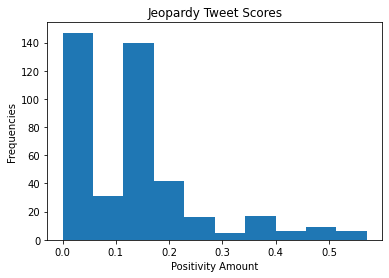

In [29]:
fig0, ax0 = plt.subplots()
ax0.hist(sentiments_df['pos'])
ax0.set_title("Jeopardy Tweet Scores")
ax0.set_xlabel("Positivity Amount") 
ax0.set_ylabel("Frequencies")
plt.show()

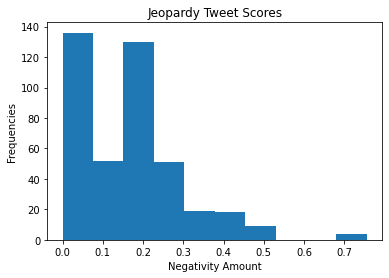

In [32]:
fig1, ax1 = plt.subplots()
ax1.hist(sentiments_df['neg'])
ax1.set_title("Jeopardy Tweet Scores") 
ax1.set_xlabel("Negativity Amount") 
ax1.set_ylabel("Frequencies") 
plt.show()

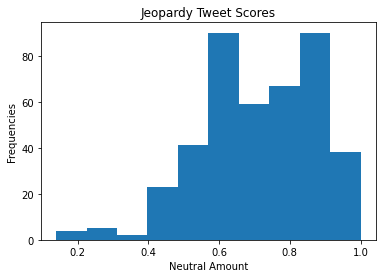

In [40]:
fig3, ax3 = plt.subplots()
ax3.hist(sentiments_df['neu'])
ax3.set_title("Jeopardy Tweet Scores") 
ax3.set_xlabel("Neutral Amount") 
ax3.set_ylabel("Frequencies") 
plt.show()
plt.show()

In [41]:
oly = pd.read_csv('WOF_data.csv', encoding = 'utf-8')

In [42]:
oly.keys()

Index(['Unnamed: 0', 'possibly_sensitive', 'text', 'author_id', 'lang',
       'source', 'public_metrics', 'created_at', 'id', 'attachments'],
      dtype='object')

In [43]:
oly.head()

,Unnamed: 0,possibly_sensitive,text,author_id,lang,source,public_metrics,created_at,id,attachments
0,0,False,RT @patsajak: A Christmas message to my fellow...,7.406850e+17,en,Twitter for iPhone,"{'retweet_count': 1014, 'reply_count': 0, 'lik...",2021-12-09T21:19:18.000Z,1469054067867533317,NaN
1,1,False,RT @patsajak: A Christmas message to my fellow...,2.752687e+08,en,Twitter for iPhone,"{'retweet_count': 1014, 'reply_count': 0, 'lik...",2021-12-09T21:17:37.000Z,1469053646876905475,NaN
2,2,False,RT @patsajak: A Christmas message to my fellow...,1.409894e+18,en,Twitter for Android,"{'retweet_count': 1014, 'reply_count': 0, 'lik...",2021-12-09T21:17:29.000Z,1469053612580028422,NaN
3,3,False,RT @patsajak: I don’t know which is stranger: ...,1.820274e+08,en,Twitter for Android,"{'retweet_count': 281, 'reply_count': 0, 'like...",2021-12-09T21:13:40.000Z,1469052653019832322,NaN
4,4,False,@patsajak @proudtigerlsu Start by encouraging ...,1.330241e+18,en,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-09T21:11:57.000Z,1469052218737414150,NaN


In [44]:
oly['lang'].astype('category')

0      en
1      en
2      en
3      en
4      en
       ..
495    en
496    en
497    en
498    en
499    en
Name: lang, Length: 500, dtype: category
Categories (3, object): ['en', 'tr', 'und']

In [45]:
oly_enposts = oly[(oly['lang'] == 'en')]

In [46]:
oly_enposts['text'].head()

0    RT @patsajak: A Christmas message to my fellow...
1    RT @patsajak: A Christmas message to my fellow...
2    RT @patsajak: A Christmas message to my fellow...
3    RT @patsajak: I don’t know which is stranger: ...
4    @patsajak @proudtigerlsu Start by encouraging ...
Name: text, dtype: object

In [47]:
oly_enposts['text'].iloc[6]

'RT @patsajak: “Please hold. Your call is important to us. Just not important enough to hire enough operators to answer your call.”'

In [48]:
analyser = SentimentIntensityAnalyzer()

In [49]:
print(analyser.polarity_scores(oly_enposts['text'].iloc[3]))

{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2716}


In [50]:
oly_enposts['text'].iloc[400]

'RT @patsajak: A Christmas message to my fellow Californians: If you plan to steal merchandise, please keep it under $950. This way, it’s a…'

In [51]:
a_sent = analyser.polarity_scores(oly_enposts['text'].iloc[400])

In [52]:
a_sent['pos']

0.084

In [53]:
sentiments = [analyser.polarity_scores(x) for x in oly_enposts['text']]

In [54]:
sentiments_df = pd.DataFrame(sentiments)

In [55]:
sentiments_df.head()

,neg,neu,pos,compound
0,0.116,0.800,0.084,-0.2263
1,0.116,0.800,0.084,-0.2263
2,0.116,0.800,0.084,-0.2263
3,0.000,0.913,0.087,0.2716
4,0.109,0.741,0.150,0.2960


In [56]:
sentiments_df['pos'].describe()

count    498.000000
mean       0.096492
std        0.091340
min        0.000000
25%        0.077000
50%        0.077000
75%        0.084000
max        0.610000
Name: pos, dtype: float64

In [58]:
sentiments_df['neg'].describe()

count    498.000000
mean       0.066952
std        0.052092
min        0.000000
25%        0.000000
50%        0.068000
75%        0.116000
max        0.545000
Name: neg, dtype: float64

In [59]:
from matplotlib import pyplot as plt

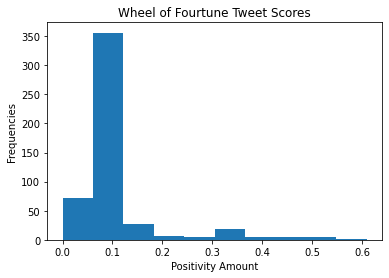

In [61]:
fig0, ax0 = plt.subplots()
ax0.hist(sentiments_df['pos'])
ax0.set_title("Wheel of Fourtune Tweet Scores") 
ax0.set_xlabel("Positivity Amount") 
ax0.set_ylabel("Frequencies") 
plt.show()

Graph based on the positive sentiment % of the tweets regarding WOF. 

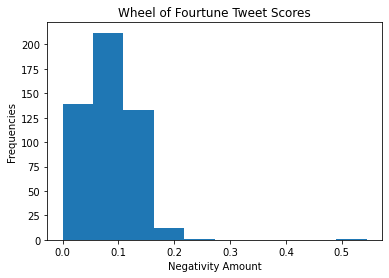

In [62]:
fig1, ax1 = plt.subplots()
ax1.hist(sentiments_df['neg'])
ax1.set_title("Wheel of Fourtune Tweet Scores") 
ax1.set_xlabel("Negativity Amount") 
ax1.set_ylabel("Frequencies")
plt.show()

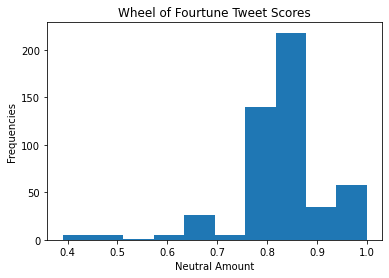

In [63]:
fig3, ax3 = plt.subplots()
ax3.hist(sentiments_df['neu'])
ax3.set_title("Wheel of Fourtune Tweet Scores") 
ax3.set_xlabel("Neutral Amount") 
ax3.set_ylabel("Frequencies")
plt.show()

### Analysis:

The data is organized within data frames. Once I had all 500 tweets about each subject, they are sent to a csv/excel file for easier analysis.  

Limitations
- Some limitations I've had were attempting to steer clear of a null hypothesis, and ensuring a univariant distribution. 

Conclusion:
- Comparing the positive and negative scores, Jeopardy! had a higher positive mean value of 0.127. WOF had a 0.096 positive mean score. But, Jeopardy! had a much higher negative mean value than WOF at 0.154 while WOF had 0.066. 
- My conclusion is, there are simply more people on Twitter talking about Jeopardy!. Some people might not tweet until they have felt a certain emotion after watching. I think that Jeopardy! could be the more watched show because there are more tweets regarding it, Or the fanbase of Jeopardy! could use Twitter more than fans of WOF. 
- Another possibility is, Jeopardy! could me less liked. This is because while there are more unique tweets regarding Jeopardy!, they are more negative 0.27.  
- There are multiple ways that I could expand this analysis. For example, I could expand on this analysis by using other social media platforms to get a better sample of data. 